In [276]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from library.sb_utils import save_file
warnings.filterwarnings('ignore')

In [277]:
columesummary=['time_stamp','salinity','turbidity','ORP','PH','TDS','Pressure in','Pressure out','pump current','Human Counter','temperature','water level']

In [278]:
pooldata=pd.read_csv('../pool_data_202211111622.csv', sep=',')

In [279]:
pooldata=pooldata[columesummary].dropna()

In [280]:
pooldata['time_stamp']=pd.to_datetime(pooldata['time_stamp'], utc=True)

In [281]:
pooldata.head()

,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Human Counter,temperature,water level
0,2022-11-01 15:01:16.220000+00:00,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,74.2574,500.0
1,2022-11-01 15:01:26.323000+00:00,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,74.2574,500.0
2,2022-11-01 15:01:36.386000+00:00,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,74.2574,500.0
3,2022-11-01 15:01:46.498000+00:00,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,74.2574,500.0
4,2022-11-01 15:01:56.554000+00:00,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,74.2574,500.0


In [282]:
pooldata=pooldata.sort_values(by='time_stamp')

In [283]:
pooldata.set_index('time_stamp',inplace=True)

In [284]:
pooldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43604 entries, 2022-11-01 04:00:06.605000+00:00 to 2022-11-08 04:59:54.377000+00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salinity       43604 non-null  float64
 1   turbidity      43604 non-null  float64
 2   ORP            43604 non-null  float64
 3   PH             43604 non-null  float64
 4   TDS            43604 non-null  float64
 5   Pressure in    43604 non-null  float64
 6   Pressure out   43604 non-null  float64
 7   pump current   43604 non-null  float64
 8   Human Counter  43604 non-null  float64
 9   temperature    43604 non-null  float64
 10  water level    43604 non-null  float64
dtypes: float64(11)
memory usage: 4.0 MB


In [285]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = 'time_stamp', y = col, data=pooldata.reset_index(), alpha=0.5)
        ax.set(xlabel='time_stamp', ylabel=col)
        ax.tick_params(axis='x', labelrotation=45)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [286]:
colume=['salinity','turbidity','ORP','PH','TDS','Pressure in','Pressure out','pump current','Human Counter','temperature','water level']

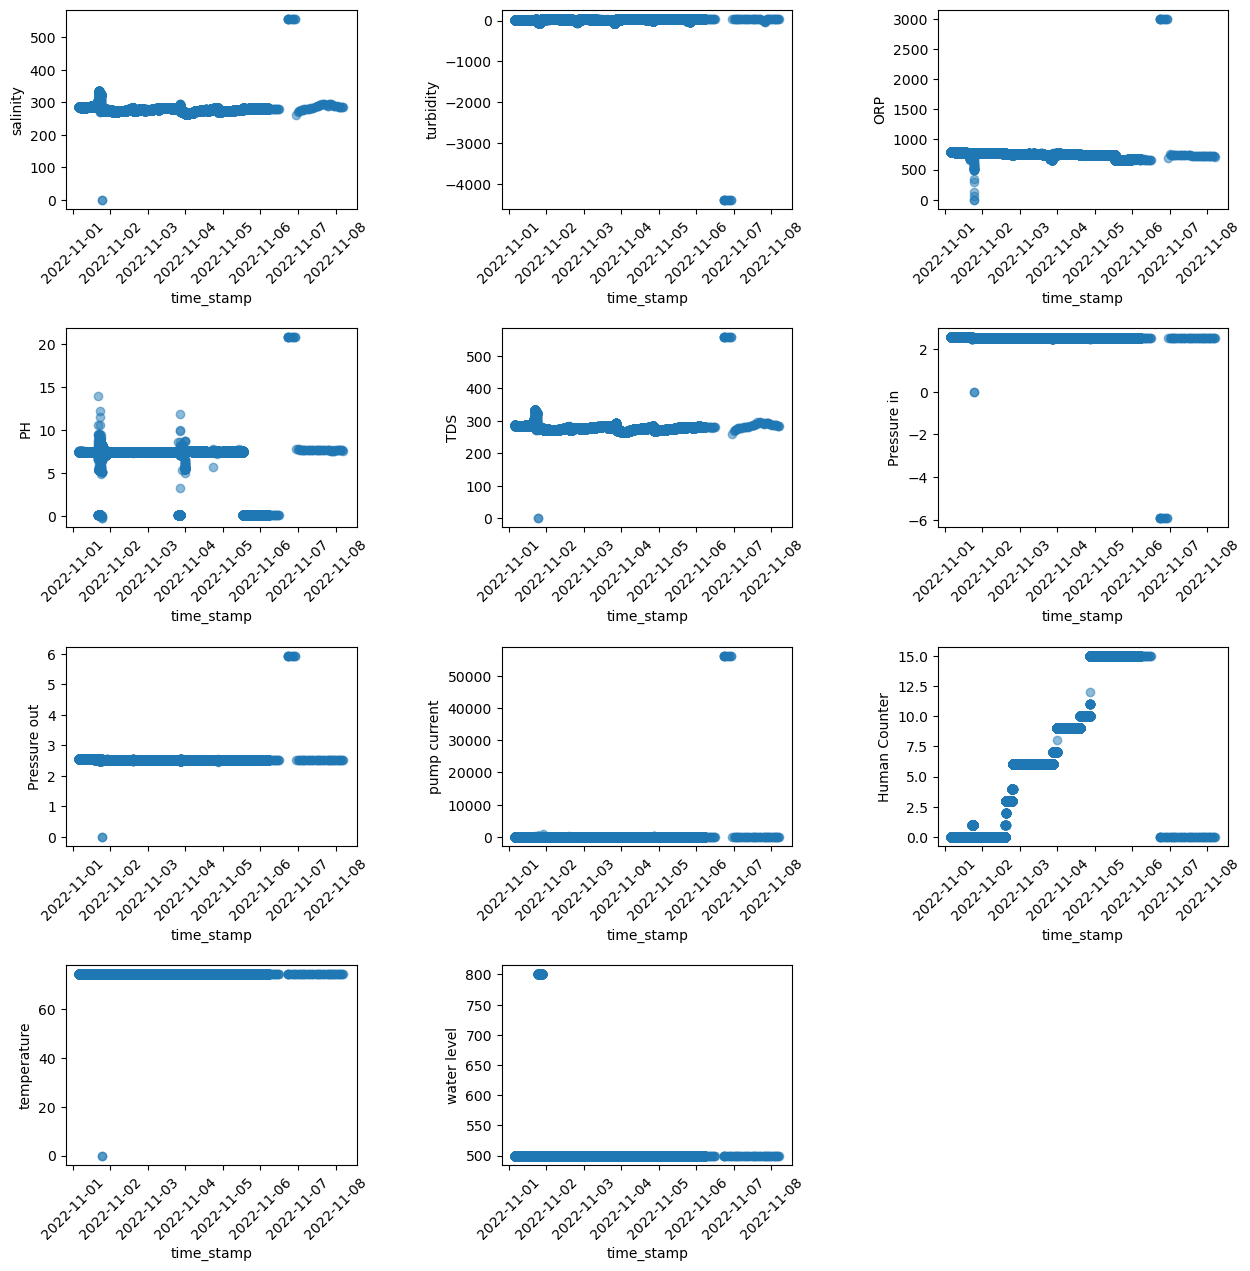

In [287]:
scatterplots(colume, ncol=3,figsize=(15, 15))

# PH

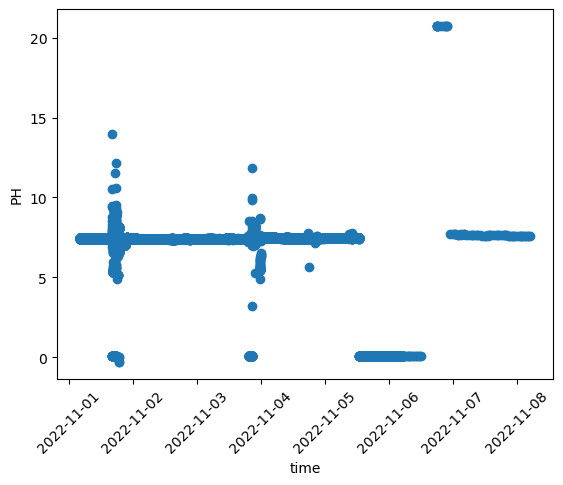

In [288]:
plt.scatter(pooldata.index, pooldata.PH)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("PH")
plt.show()

In [289]:
pooldataaccept=pooldata.loc[(pooldata['PH']<8) & (pooldata['PH']>7),:]

In [290]:
pooldata.loc[(pooldata['PH']>8) | (pooldata['PH']<7),'PH']=np.nan

In [291]:
pooldata['PH'].fillna(method='ffill', inplace=True)

In [292]:
len(pooldataaccept)/len(pooldata)

0.8409090909090909

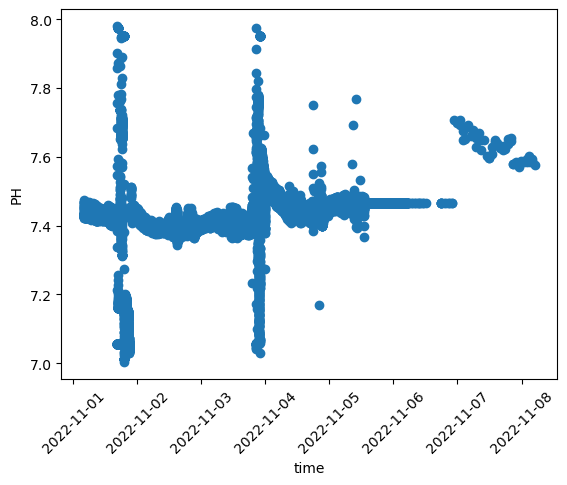

In [293]:
plt.scatter(pooldata.index, pooldata.PH)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("PH")
plt.show()

# Salinity

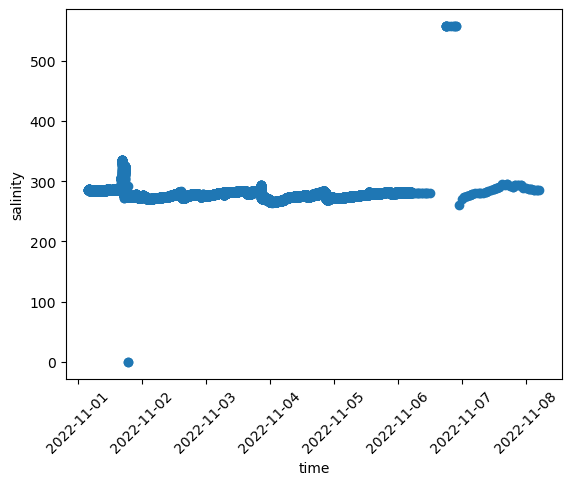

In [294]:
plt.scatter(pooldata.index, pooldata.salinity)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("salinity")
plt.show()

In [295]:
pooldata.loc[(pooldata['salinity']>400) | (pooldata['salinity']<200),'salinity']=np.nan

In [296]:
pooldata['salinity'].fillna(method='ffill', inplace=True)

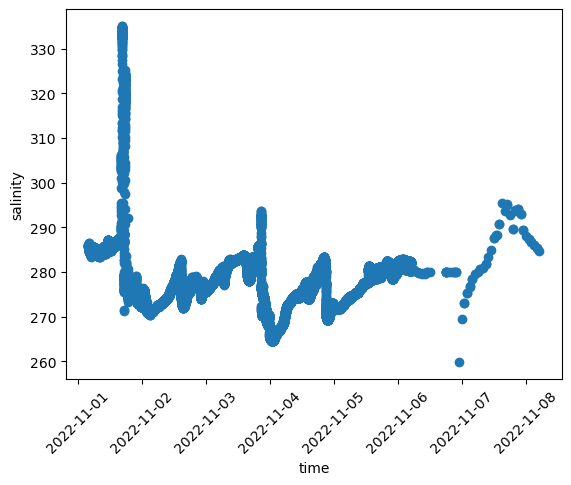

In [297]:
plt.scatter(pooldata.index, pooldata.salinity)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("salinity")
plt.show()

# Turbidity

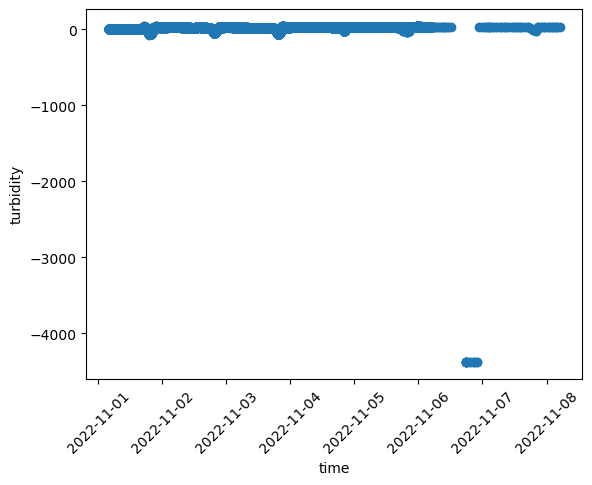

In [298]:
plt.scatter(pooldata.index, pooldata.turbidity)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("turbidity")
plt.show()

In [299]:
pooldata.loc[(pooldata['turbidity']<-1000),'turbidity']=np.nan

In [300]:
pooldata['turbidity'].fillna(method='ffill', inplace=True)

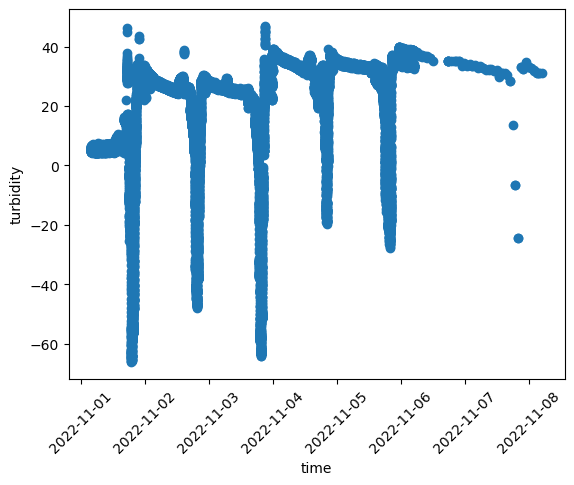

In [301]:
plt.scatter(pooldata.index, pooldata.turbidity)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("turbidity")
plt.show()

# ORP

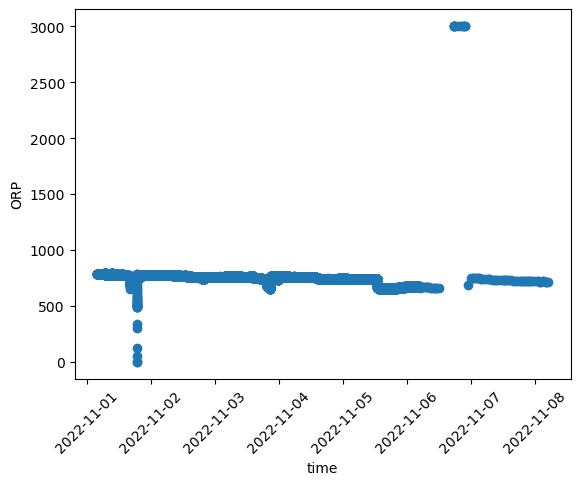

In [302]:
plt.scatter(pooldata.index, pooldata.ORP)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("ORP")
plt.show()

In [303]:
pooldata.loc[(pooldata["ORP"]>1000),"ORP"]=np.nan

In [304]:
pooldata['ORP'].fillna(method='ffill', inplace=True)

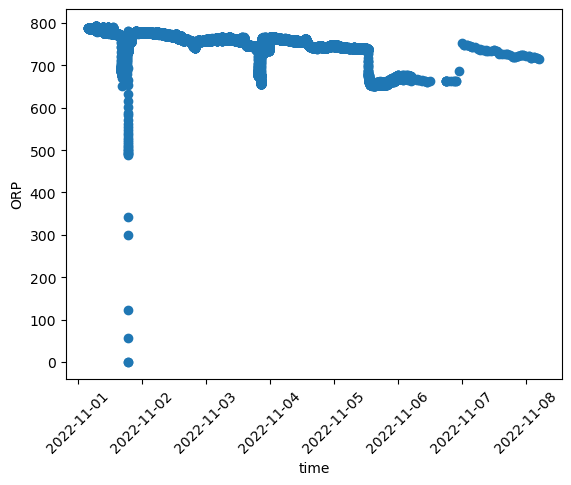

In [305]:
plt.scatter(pooldata.index, pooldata.ORP)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("ORP")
plt.show()

# TDS

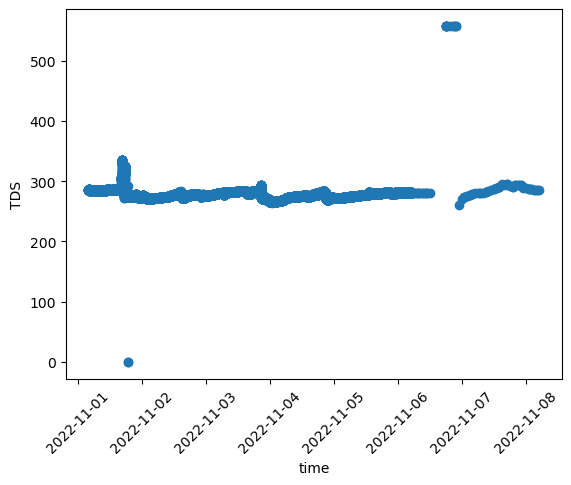

In [306]:
plt.scatter(pooldata.index, pooldata.TDS)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("TDS")
plt.show()

In [307]:
pooldata.loc[(pooldata['TDS']>400) | (pooldata['TDS']<200),'TDS']=np.nan

In [308]:
pooldata['TDS'].fillna(method='ffill', inplace=True)

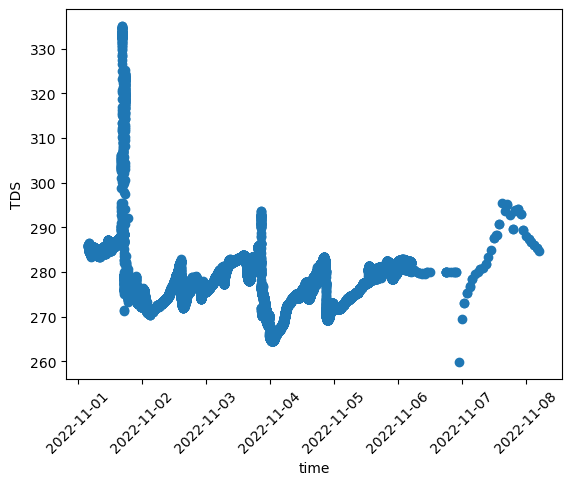

In [309]:
plt.scatter(pooldata.index, pooldata.TDS)
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("TDS")
plt.show()

# Pressure In

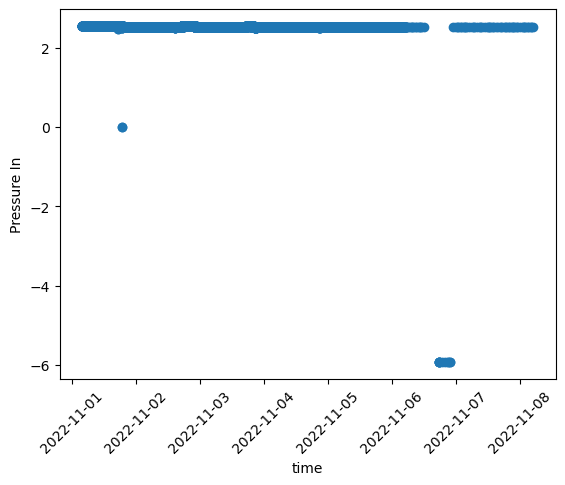

In [310]:
plt.scatter(pooldata.index, pooldata['Pressure in'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("Pressure In")
plt.show()

In [311]:
pooldata.loc[(pooldata['Pressure in']<1),'Pressure in']=np.nan

In [312]:
pooldata['Pressure in'].fillna(method='ffill', inplace=True)

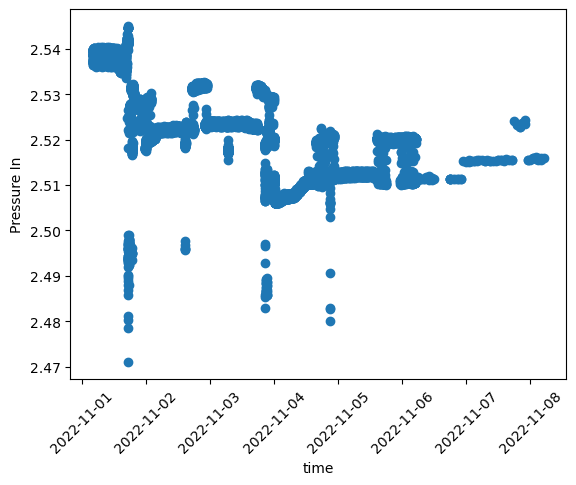

In [313]:
plt.scatter(pooldata.index, pooldata['Pressure in'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("Pressure In")
plt.show()

# Pressure Out

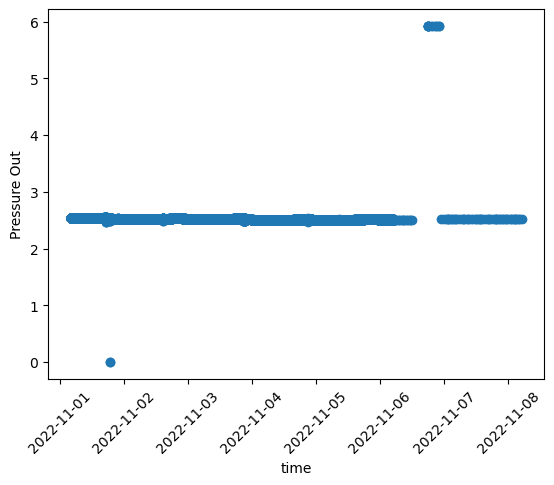

In [314]:
plt.scatter(pooldata.index, pooldata['Pressure out'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("Pressure Out")
plt.show()

In [315]:
pooldata.loc[(pooldata['Pressure out']>3) | (pooldata['Pressure out']<1),'Pressure out']=np.nan

In [316]:
pooldata['Pressure out'].fillna(method='ffill', inplace=True)

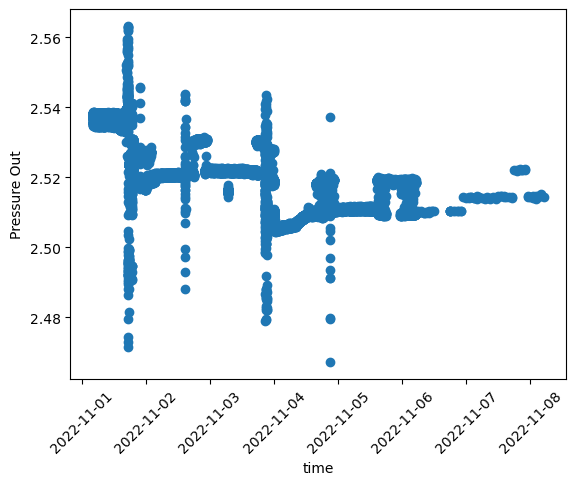

In [317]:
plt.scatter(pooldata.index, pooldata['Pressure out'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("Pressure Out")
plt.show()

# Pump current

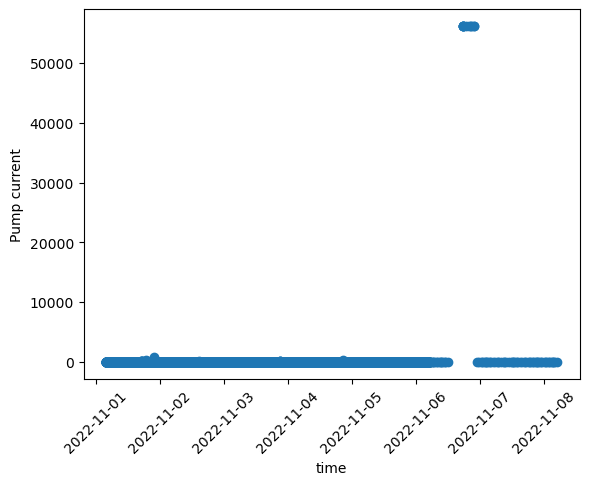

In [318]:
plt.scatter(pooldata.index, pooldata['pump current'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("Pump current")
plt.show()

In [319]:
pooldata.loc[(pooldata['pump current']>10000),'pump current']=np.nan

In [320]:
pooldata['pump current'].fillna(method='ffill', inplace=True)

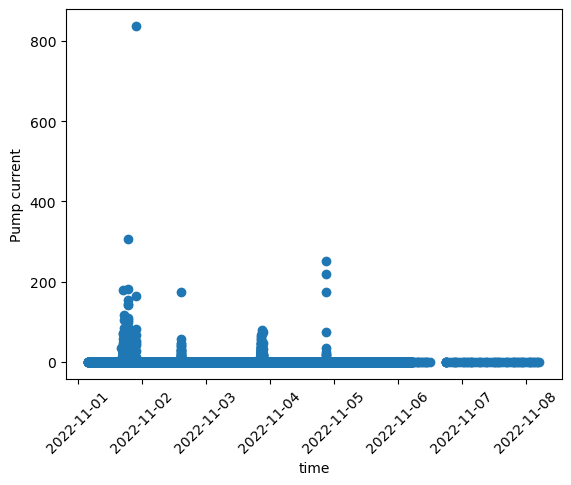

In [321]:
plt.scatter(pooldata.index, pooldata['pump current'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("Pump current")
plt.show()

# Human Counter

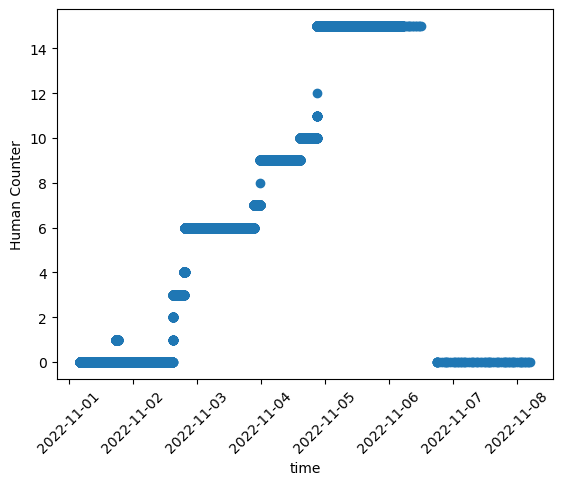

In [322]:
plt.scatter(pooldata.index, pooldata['Human Counter'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("Human Counter")
plt.show()

In [323]:
HumanDiff=[pooldata.loc[pooldata.index[i+1],'Human Counter']-pooldata.loc[pooldata.index[i],'Human Counter'] for i in range(len(pooldata.index)-1)]
HumanDiff.append(0)

In [324]:
pooldata['Human Diff']=HumanDiff

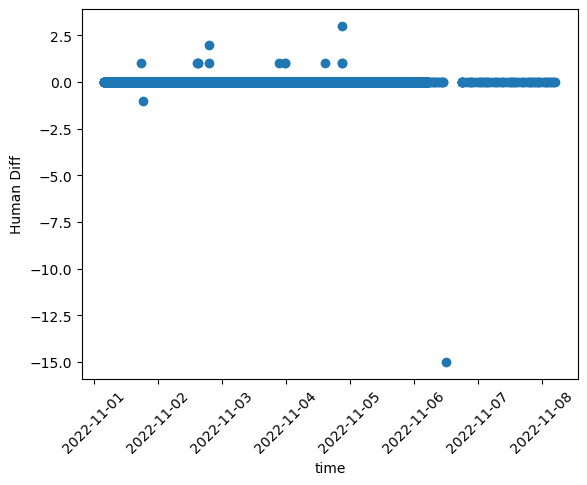

In [325]:
plt.scatter(pooldata.index, pooldata['Human Diff'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("Human Diff")
plt.show()

In [326]:
pooldata.loc[(pooldata["Human Diff"]<0),"Human Diff"]=np.nan

In [327]:
pooldata['Human Diff'].fillna(method='ffill', inplace=True)

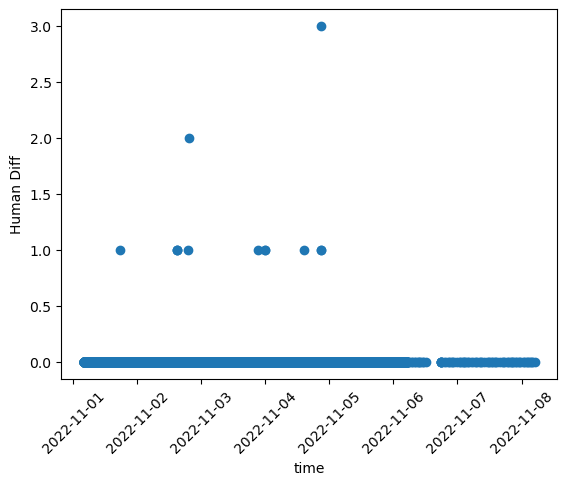

In [328]:
plt.scatter(pooldata.index, pooldata['Human Diff'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("Human Diff")
plt.show()

# Temperature

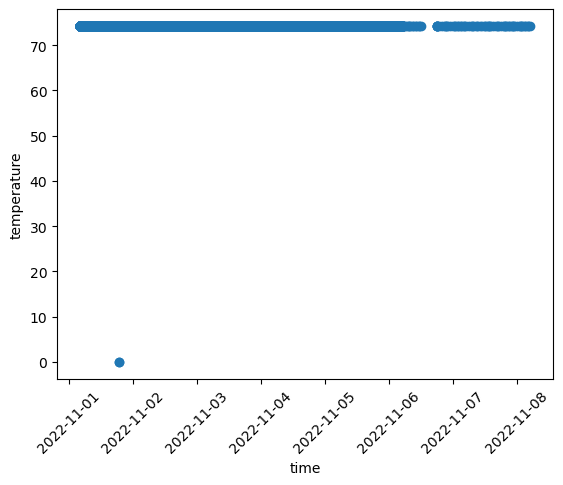

In [329]:
plt.scatter(pooldata.index, pooldata['temperature'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("temperature")
plt.show()

In [330]:
pooldata.loc[(pooldata["temperature"]<10),"temperature"]=np.nan

In [331]:
pooldata['temperature'].fillna(method='ffill', inplace=True)

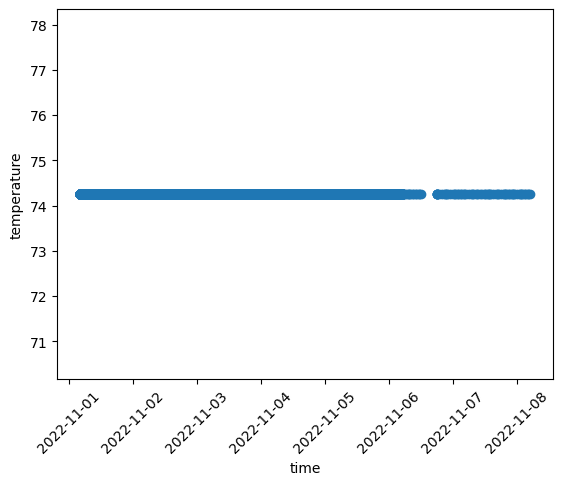

In [332]:
plt.scatter(pooldata.index, pooldata['temperature'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel("temperature")
plt.show()

# Water level

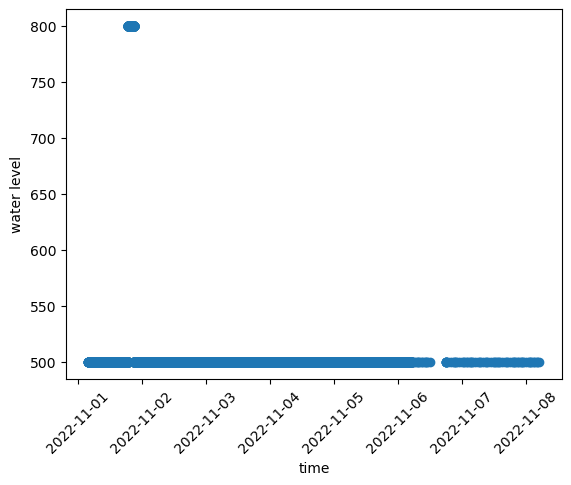

In [333]:
plt.scatter(pooldata.index, pooldata['water level'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel('water level')
plt.show()

In [334]:
pooldata.loc[(pooldata["water level"]>600),"water level"]=np.nan

In [335]:
pooldata['water level'].fillna(method='ffill', inplace=True)

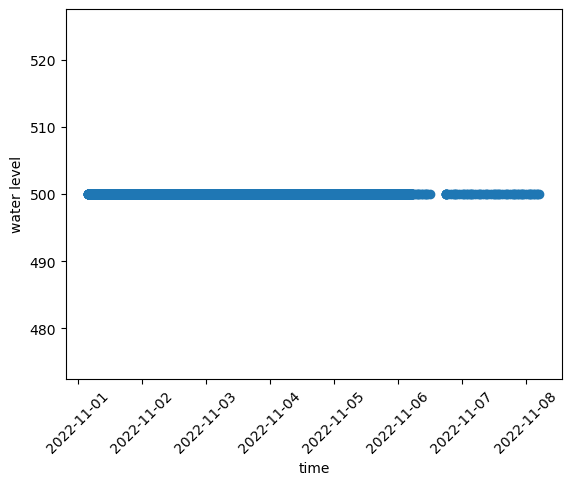

In [336]:
plt.scatter(pooldata.index, pooldata['water level'])
plt.xlabel("time")
plt.xticks(rotation = 45)
plt.ylabel('water level')
plt.show()

# Overall final figure

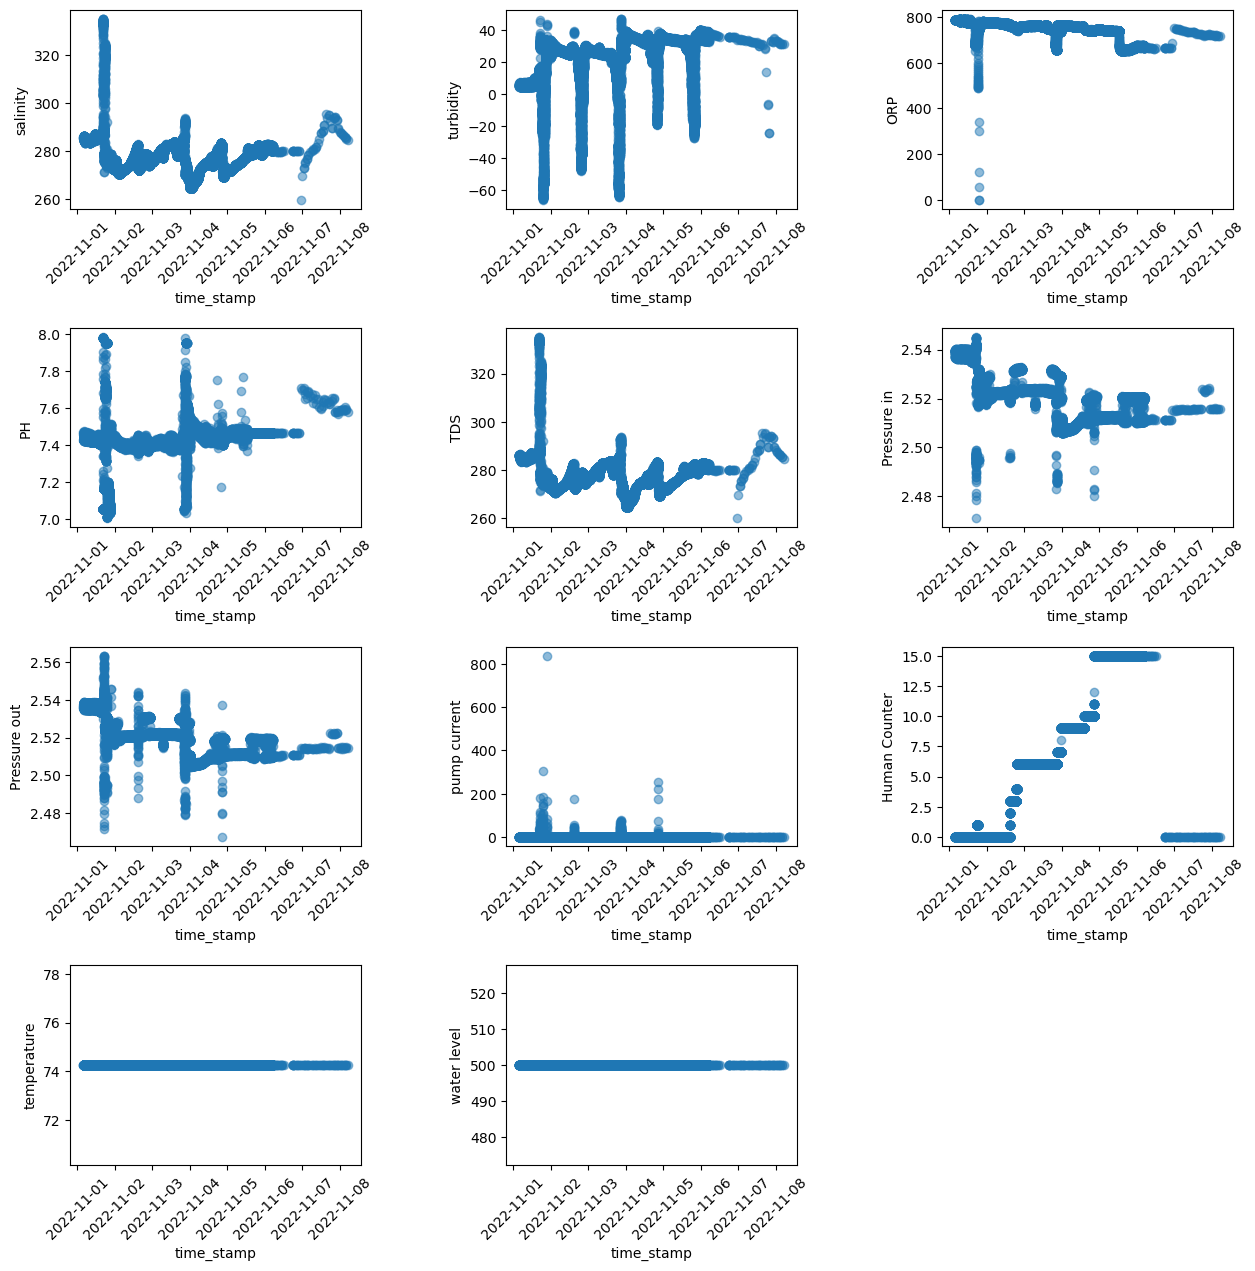

In [337]:
scatterplots(colume, ncol=3,figsize=(15, 15))

In [338]:
save_file(pooldata, 'clean_pool.csv','../Michael_Notebooks')

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../Michael_Notebooks\clean_pool.csv"
